# Sirve para hacer calculos matematicos mas rapidos.
 * Es una libreria mas cientifica
 * Manipulacion de arreglos, operaciones estadisticas y muchas cosas

In [1]:
import pandas as pd
import numpy as np
import os

# Se hace la lectura del archivo
df = pd.read_csv('fifa_eda.csv')

df.sample(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
7760,207898,E. Soriano,29,Germany,67,67,Korona Kielce,750.0,3.0,Right,1.0,2.0,ST,2017,2019-01-01,6.000000,181.0,1000.0
14598,242918,L. Agüero,21,Argentina,61,72,Godoy Cruz,450.0,2.0,Right,1.0,2.0,ST,2018,2021-01-01,5.833333,161.0,743.0
17173,240537,L. Wackerle,22,Austria,55,61,SKN St. Pölten,90.0,1.0,Right,1.0,1.0,GK,2017,2021-01-01,6.083333,185.0,149.0


In [2]:
#Transformar la Columna Age a un array de Numpy
age_np = df['Age'].to_numpy()

In [3]:
# Se muestra el tipo de variable para age_np
type(age_np)

numpy.ndarray

In [4]:
# Trae los primeros 10 registros
# Tener en cuenta que cuando se cambio el tipo de datos, se cambia la sinatxis para poder accederlos
age_np[0:10]

array([31, 33, 26, 27, 27, 27, 32, 31, 32, 25])

In [10]:
df['Age'][0:10]

0    31
1    33
2    26
3    27
4    27
5    27
6    32
7    31
8    32
9    25
Name: Age, dtype: int64

In [11]:
# Cuenta los valores que no son ceros
np.count_nonzero(age_np)
# tambien se puede usar np.shape()

np.int64(18207)

In [12]:
# Obtiene las edades mayores a 30 años
# El resto son ceros (o cualquier otro valor) cuando no es mayor a cero pone 999
np.where(age_np > 30, age_np, 999)

array([ 31,  33, 999, ..., 999, 999, 999], shape=(18207,))

In [13]:
#Indica el jugador mas viejo
ixoldest = np.argmax(age_np)
age_np[ixoldest]

np.int64(45)

# Operaciones estadisticas

In [14]:
# Obtener la media de la edad
# Tomar en cuenta el formateo del numero
# Se puede hacer el ejemplo sin formato
media = age_np.mean()
format_media = "{:.2f}".format(media)
print('la media de los jugadores es: ', format_media,'años')

la media de los jugadores es:  25.12 años


In [17]:
# Obtener los percentiles
for i in range (0, 100, 5):
    print(i, "%: ", np.percentile(age_np, i))

0 %:  16.0
5 %:  18.0
10 %:  19.0
15 %:  20.0
20 %:  21.0
25 %:  21.0
30 %:  22.0
35 %:  23.0
40 %:  23.0
45 %:  24.0
50 %:  25.0
55 %:  25.0
60 %:  26.0
65 %:  27.0
70 %:  28.0
75 %:  28.0
80 %:  29.0
85 %:  30.0
90 %:  32.0
95 %:  33.0


In [19]:
# Para calcular la moda, generamos una rray con los valores unicos de edad
# Y luego vemos el que tiene mas cuentas
vals, counts = np.unique(age_np, return_counts=True)
index = np.argmax(counts) #El indice de la edad mas contada
moda = vals[index]
print(f"La moda de la edad de los jugadores es = {moda:.2f} años")

La moda de la edad de los jugadores es = 21.00 años


In [20]:
counts

array([  42,  289,  732, 1024, 1240, 1423, 1340, 1332, 1358, 1319, 1387,
       1162, 1101,  959,  917,  707,  574,  408,  404,  196,  127,   82,
         37,   25,   13,    5,    1,    2,    1])

In [22]:
# Se caldula me mediana
mediana = np.median(age_np)
print(f"La mediana de la edad de los jugadores es = {mediana:.2f} años")

La mediana de la edad de los jugadores es = 25.00 años


In [23]:
# Desviacion estandar
desvstd = age_np.std()
print(f"La desviacion estandard de la edad de los jugadores es = {desvstd:.2f} años")

La desviacion estandard de la edad de los jugadores es = 4.67 años


# Graficos con numpy

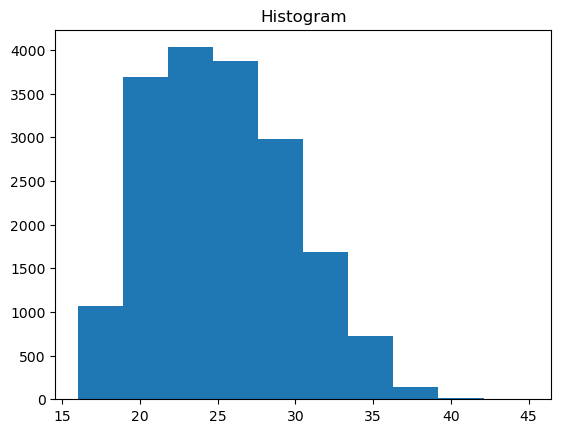

In [24]:
# Se genera un histograma rapido
import matplotlib.pyplot as plt
plt.hist(age_np)
plt.title("Histogram")
plt.show()

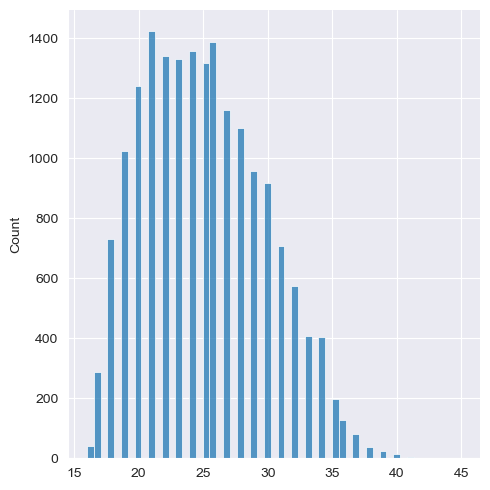

In [25]:
# Se puede mejorar la visualizacion mucho con Seaborn
import seaborn as sns
sns.set_style('darkgrid')
sns.displot(age_np)

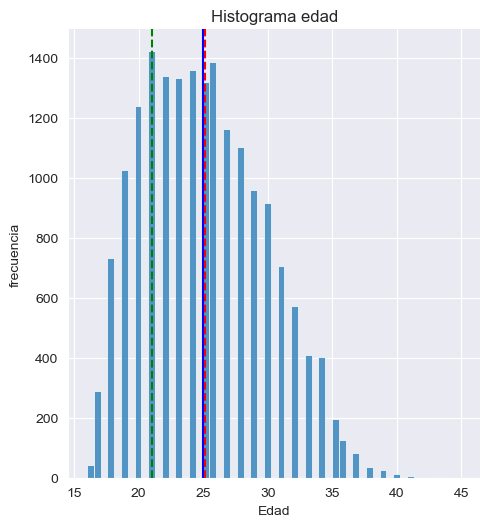

In [26]:
sns.displot(age_np)
plt.xlabel('Edad')
plt.ylabel('frecuencia')
plt.title('Histograma edad')
plt.axvline(x=age_np.mean(), color='red', ls='--')
plt.axvline(x=mediana, color='blue', ls='-')
plt.axvline(x=moda, color='green', ls='--')

# Ordenamiento y posicion - Numpy

In [3]:
# Se tienen miles de registros
# Se usa len para validar el numero total de jugadores
print('Numero total de jugadores: ', len(age_np))

Numero total de jugadores:  18207


In [5]:
# Para obtener el ultimo valor
age_np[18206]

np.int64(16)

In [6]:
# Maxima edad - amax
print('La maxima edad de los jugadores es: ', np.amax(age_np))
print('La minima edad de los jugadores es: ', np.amin(age_np))

La maxima edad de los jugadores es:  45
La minima edad de los jugadores es:  16


In [14]:
# Ejercicio de ordenamiento
# Genera un array con las primeras edades
age_top = np.concatenate(age_np)

ValueError: zero-dimensional arrays cannot be concatenated

In [ ]:
#Array de variables ordenenadas
age_top = np.sort(age_np)
print(age_top)

[16 16 16 ... 44 44 45]


In [19]:
# No existe el ordenamiento en reversa
age_top_num_rev = age_top[::-1]

In [20]:
age_top_num_rev[0:20]

array([45, 44, 44, 42, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40])

In [24]:
#Grafico de edades por orden
import matplotlib as plt
from matplotlib.ticker import StrMethodFormatter

x = df.sort_values(by=['Age'], ascending=False).head(10)[['Name', 'Age']]

In [25]:
x

,Name,Age
4741,O. Pérez,45
18183,K. Pilkington,44
17726,T. Warner,44
10545,S. Narazaki,42
7225,C. Muñoz,41
1120,J. Villar,41
12192,H. Sulaimani,41
15426,M. Tyler,41
4228,B. Nivet,41
10356,F. Kippe,40


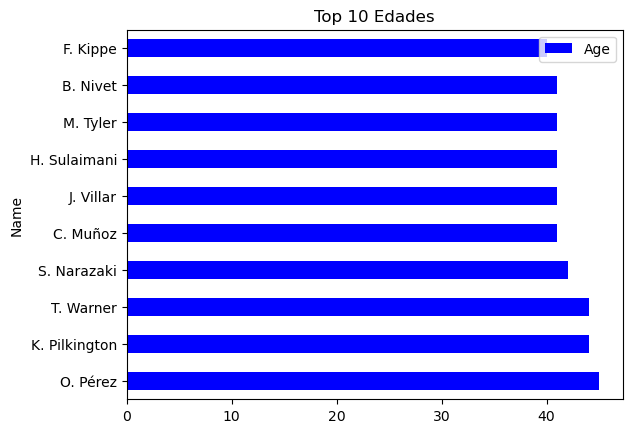

In [27]:
ax = x.plot.barh( y='Age', x='Name', color='b', title='Top 10 Edades')

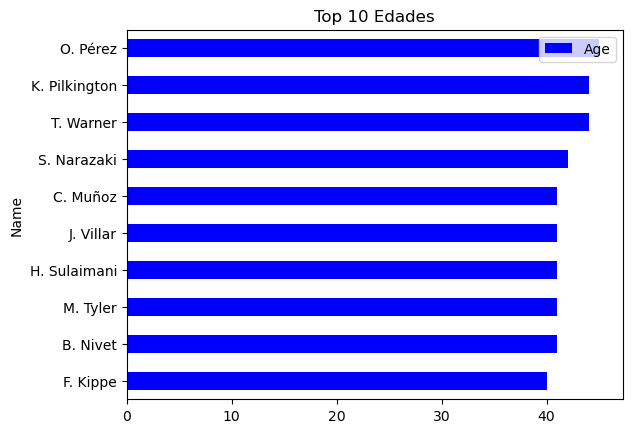

In [29]:
ax = x.iloc[::-1].plot.barh( y='Age', x='Name', color='b', title='Top 10 Edades')

# Correlacion

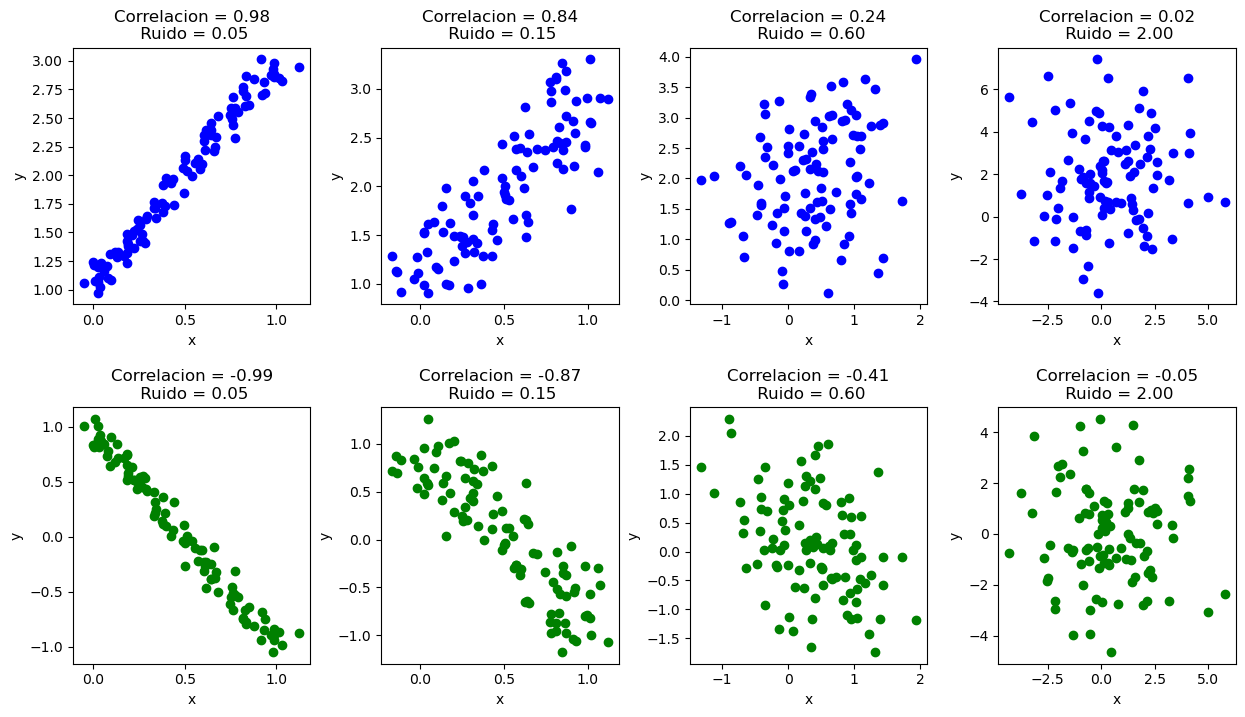

In [9]:
#Ejemplo para explicar la correlacion
# Introduccion a la correlacion
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
seed = 13
rand = np.random.RandomState(seed)
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,8))

x = rand.uniform(0,1,100)
x = np.vstack((x,x*2+1))
x= np.vstack((x,-x[0,]*2+1))
x=np.vstack((x,rand.normal(1,3,100)))

for noise, i in zip([0.05,0.15,0.6,2],[0,1,2,3]):
    #Añade Ruido
    x_with_noise = x+rand.normal(0,noise,x.shape)

    #Calcular la correlacion
    rho_noise = np.corrcoef(x_with_noise)

    #Correlacion positiva en la primera linea y negativa en la segunda
    ax[0,i].scatter(x_with_noise[0,],x_with_noise[1,],color='blue')
    ax[1,i].scatter(x_with_noise[0,],x_with_noise[2,],color='green')
    ax[0,i].title.set_text('Correlacion = ' + "{:.2f}".format(rho_noise[0,1]) + '\n Ruido = ' + "{:.2f}".format(noise) )
    ax[1,i].title.set_text('Correlacion = ' + "{:.2f}".format(rho_noise[0,2]) + '\n Ruido = ' + "{:.2f}".format(noise) )
    ax[0,i].set(xlabel='x',ylabel='y')
    ax[1,i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=0.3,hspace=0.4)
plt.show()




In [11]:
df_num = df.select_dtypes(include='number')
df_num.corr()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
ID,1.000000,-0.739208,-0.417025,0.047074,-0.139837,-0.204610,-0.356191,-0.056914,0.206749,-0.090090,-0.191193,-0.121297
Age,-0.739208,1.000000,0.452350,-0.253312,0.078315,0.141145,0.253765,0.027649,-0.202658,0.082506,0.229940,0.058672
Overall,-0.417025,0.452350,1.000000,0.660939,0.631848,0.571926,0.499491,0.414463,-0.169281,0.038527,0.154557,0.597821
Potential,0.047074,-0.253312,0.660939,1.000000,0.579608,0.486413,0.372993,0.354290,-0.047661,-0.009791,-0.006935,0.562346
Value,-0.139837,0.078315,0.631848,0.579608,1.000000,0.858086,0.656158,0.317246,-0.115991,0.002827,0.046702,0.973310
Wage,-0.204610,0.141145,0.571926,0.486413,0.858086,1.000000,0.668635,0.263205,-0.142337,0.019638,0.064764,0.828161
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.656158,0.668635,1.000000,0.208153,-0.133009,0.034881,0.088340,0.620863
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.317246,0.263205,0.208153,1.000000,0.020692,-0.422753,-0.351209,0.297471
Joined,0.206749,-0.202658,-0.169281,-0.047661,-0.115991,-0.142337,-0.133009,0.020692,1.000000,0.001188,-0.028274,-0.115374
Height,-0.090090,0.082506,0.038527,-0.009791,0.002827,0.019638,0.034881,-0.422753,0.001188,1.000000,0.754678,0.001835


In [12]:
df_num = df.select_dtypes(include='number')
df_num.corr(method='pearson')

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
ID,1.000000,-0.739208,-0.417025,0.047074,-0.139837,-0.204610,-0.356191,-0.056914,0.206749,-0.090090,-0.191193,-0.121297
Age,-0.739208,1.000000,0.452350,-0.253312,0.078315,0.141145,0.253765,0.027649,-0.202658,0.082506,0.229940,0.058672
Overall,-0.417025,0.452350,1.000000,0.660939,0.631848,0.571926,0.499491,0.414463,-0.169281,0.038527,0.154557,0.597821
Potential,0.047074,-0.253312,0.660939,1.000000,0.579608,0.486413,0.372993,0.354290,-0.047661,-0.009791,-0.006935,0.562346
Value,-0.139837,0.078315,0.631848,0.579608,1.000000,0.858086,0.656158,0.317246,-0.115991,0.002827,0.046702,0.973310
Wage,-0.204610,0.141145,0.571926,0.486413,0.858086,1.000000,0.668635,0.263205,-0.142337,0.019638,0.064764,0.828161
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.656158,0.668635,1.000000,0.208153,-0.133009,0.034881,0.088340,0.620863
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.317246,0.263205,0.208153,1.000000,0.020692,-0.422753,-0.351209,0.297471
Joined,0.206749,-0.202658,-0.169281,-0.047661,-0.115991,-0.142337,-0.133009,0.020692,1.000000,0.001188,-0.028274,-0.115374
Height,-0.090090,0.082506,0.038527,-0.009791,0.002827,0.019638,0.034881,-0.422753,0.001188,1.000000,0.754678,0.001835


In [14]:
#Correlacion lineal (la que viene en Excel)
df_num = df.select_dtypes(include='number')
df_num.corr(method='spearman')

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
ID,1.000000,-0.761178,-0.539882,0.024668,-0.354834,-0.420951,-0.346988,-0.129660,0.195429,-0.095951,-0.202187,-0.285664
Age,-0.761178,1.000000,0.483091,-0.263367,0.226417,0.322255,0.265568,0.057824,-0.111394,0.087028,0.229935,0.143103
Overall,-0.539882,0.483091,1.000000,0.625359,0.936782,0.777972,0.436394,0.424411,-0.150620,0.038105,0.147324,0.853812
Potential,0.024668,-0.263367,0.625359,1.000000,0.770111,0.534963,0.320359,0.342562,-0.092179,-0.010427,-0.010877,0.775864
Value,-0.354834,0.226417,0.936782,0.770111,1.000000,0.775787,0.386689,0.502112,-0.124642,-0.010496,0.067579,0.945461
Wage,-0.420951,0.322255,0.777972,0.534963,0.775787,1.000000,0.395627,0.379833,-0.119478,0.017979,0.084259,0.721019
International Reputation,-0.346988,0.265568,0.436394,0.320359,0.386689,0.395627,1.000000,0.187514,-0.097513,0.036089,0.091483,0.367330
Skill Moves,-0.129660,0.057824,0.424411,0.342562,0.502112,0.379833,0.187514,1.000000,-0.003425,-0.422780,-0.345678,0.465190
Joined,0.195429,-0.111394,-0.150620,-0.092179,-0.124642,-0.119478,-0.097513,-0.003425,1.000000,-0.001311,-0.016187,-0.161476
Height,-0.095951,0.087028,0.038105,-0.010427,-0.010496,0.017979,0.036089,-0.422780,-0.001311,1.000000,0.754668,-0.008592
